In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
df=pd.read_csv('/content/blogs.csv')
df

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [2]:
df.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Labels']=le.fit_transform(df['Labels'])
df.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,0
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,2
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,0
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,0
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,2


In [8]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download the VADER lexicon
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to classify sentiment
def get_sentiment(text):
    sentiment_scores = sid.polarity_scores(text)
    if sentiment_scores['compound'] >= 0.05:
        return 'positive'
    elif sentiment_scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply the sentiment analysis on each blog post
df['Labels'] = df['Data'].apply(get_sentiment)

# Display the first few rows with the sentiment column
df[['Data', 'Labels']].head()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,negative
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,positive
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,negative
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,negative
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,positive


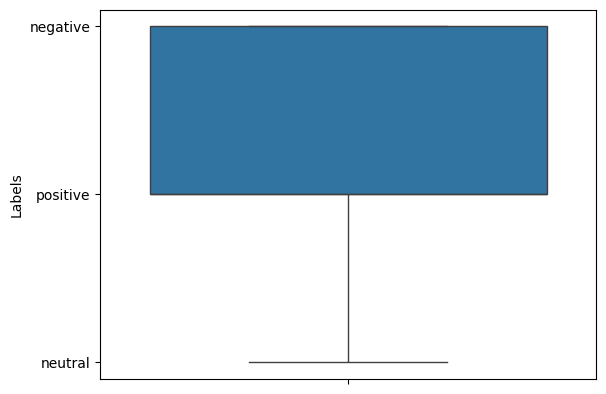

In [10]:
sns.boxplot(df['Labels'])
plt.show()

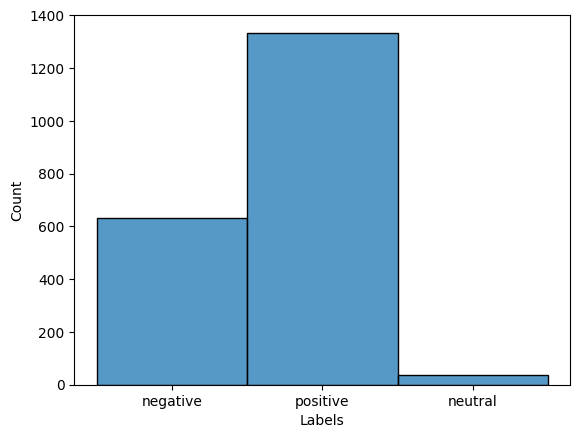

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df['Labels'])
plt.show()

In [12]:
# Preprocessing: Extract text and labels
x =df['Data']
y =df['Labels']


In [13]:
# Convert text data to numerical data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
x_tfidf = tfidf_vectorizer.fit_transform(x)


In [14]:
# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x_tfidf, y, test_size=0.3, random_state=42)


In [15]:
# Train a Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(x_train, y_train)

MultinomialNB()

In [16]:
# Make predictions on the test set
y_pred = nb_classifier.predict(x_test)

In [17]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
# Output the results
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_output)

Accuracy: 0.67
Classification Report:
              precision    recall  f1-score   support

    negative       0.50      0.01      0.01       188
     neutral       0.00      0.00      0.00        10
    positive       0.67      1.00      0.80       402

    accuracy                           0.67       600
   macro avg       0.39      0.33      0.27       600
weighted avg       0.61      0.67      0.54       600

